<a href="https://colab.research.google.com/github/SteveR-Ncl/maths-colab-notebooks/blob/main/Maths_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


## Directed graph

$ N=(1,2,3,4,5) $

$ E=\{(1,2) ,(1,3),(3,3),(4,2),(5,4),(4,3)\} $



Set up node options first

In [4]:
options = {
    "font_size": 16,
    "node_size": 600,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,

}

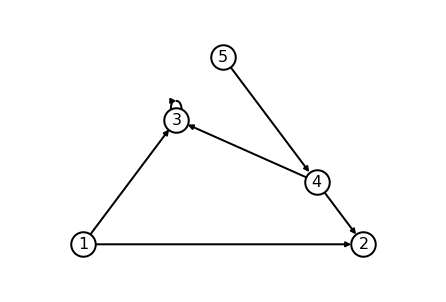

In [5]:
G=nx.DiGraph()
G.add_edges_from([(1,2),(1,3),(3,3),(4,2),(5,4),(4,3)])
nx.draw_planar (G, with_labels=True, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# From https://networkx.org/documentation/stable/auto_examples/basic/plot_simple_graph.html

In [6]:
print("Order is", G.order())

from tabulate import tabulate
print(tabulate(G.degree,headers = ["Node","Degree"]))

Order is 5
  Node    Degree
------  --------
     1         2
     2         2
     3         4
     4         3
     5         1


## Paths, Circuits, Cycles

A **path** in a directed graph $G=(N,E)$ is a sequence of nodes $n_{0}n_{1}\dots n_{k}$ such that $(n_{i},n_{i+1}) \in E$ is an edge in the directed graph $G$ for each $i=0,\ldots,k-1$

* You can only go in the direction given by the edges
* A path containing $k$ nodes has length $k-1$
* A node by itself is a path of length 0

For this graph:

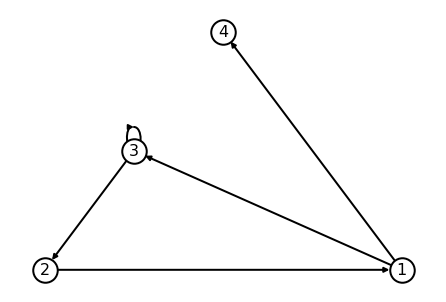

In [ ]:
G=nx.DiGraph()
G.add_edges_from([(2,1),(3,2),(3,3),(1,3),(1,4)])
nx.draw_planar (G, with_labels=True, **options)



In [ ]:
# is_path from networkx library to check if path is valid
print(nx.is_path(G,[1,3,3,3,2,1,4])) # valid
print(nx.is_path(G,[3,2,1,3,2,1])) # valid
print(nx.is_path(G,[2,1,3,3,2,3,2])) # not valid

True
True
False


A **circuit** in a directed graph $G=(N,E)$ is a path $n_{0}n_{1}\dots n_{k}$ whose start and end nodes are the same, i.e. $n_{0} = n_{k}$

* So a **circuit** is a path where you end up where you started


In [ ]:
# use the is_path function to define is_circuit
def is_circuit(G, nodes):
  return nx.is_path(G, nodes) and nodes[0] == nodes[len(nodes) - 1]

In [ ]:
print(is_circuit(G,[2,1,3,3,3,2]))  # valid
print(is_circuit(G,[2,1,3,2,1])) # not valid

True
False


A **cycle** in a directed graph $G=(N,E)$ is a circuit where you don't visit the same node twice

* Every cycle is also a circuit
* Cycle → Circuit → Path

In [ ]:
# a cycle is a circuit that's also a simple path.. except that the first and last nodes are the same!
def is_cycle(G, nodes):
  return len(set(nodes)) == len(nodes) - 1 and is_circuit(G, nodes) # means there is exactly 1 duplicate, and the duplicate is the first/last node

In [ ]:
print(is_cycle(G,[2,1,3,2])) # yes
print(is_cycle(G,[2,1,3,3,2])) # no
print(is_cycle(G,[2,1,3,2,1,3,2])) # no

True
False
False


## Subgraphs
Given graphs $G=(N,E)$ and $G'=(N',E')$, we say $G$ is a subgraph of $G'$ if and only if $N \subseteq N'$ and $E ⊆ E'$

Networkx library has a function `subgraph` to generate subgraph from list of nodes

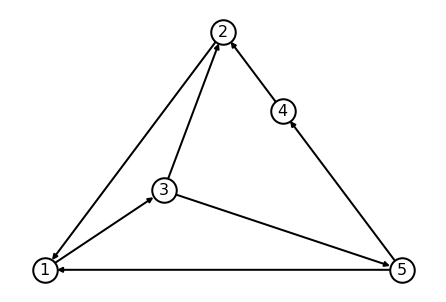

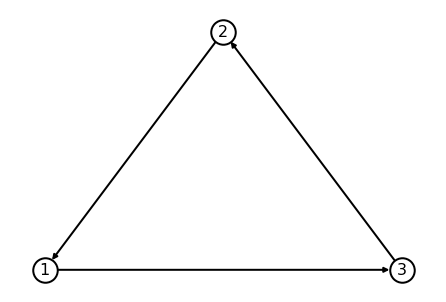

In [ ]:
G = nx.DiGraph()
G.add_edges_from([(1,3),(2,1),(3,2),(3,5),(4,2),(5,4),(5,1)])
G1 = G.subgraph([1,2,3])

nx.draw_planar (G, with_labels=True, **options)

plt.show()

nx.draw_planar (G1, with_labels=True, **options)
plt.show()

## Hamiltonian paths and graphs

A **Hamiltonian path** in a graph is one which includes all the nodes in the graph. Similarly for a Hamiltonian cycle.

If a graph has a Hamiltonian cycle, it is a **Hamiltonian graph**

In [7]:
# networkx has a function to generate a hamiltonian path but takes a tournament 
# as input. ie exactly one path between each pair of connected nodes 
# is_hamiltonian_path needs to check is_path and contains all nodes: order of graph
# gives number of nodes, len set nodes is number of distinct nodes in path
def is_hamiltonian_path(G, nodes):
  return(nx.is_path(G, nodes) and len(set(nodes) == G.order()))

def is_hamiltonian_cycle(G, nodes):
  return(is_cycle(G, nodes) and len(set(nodes) == G.order()))

# A function to check if a graph is Hamiltonian can be specified as
# exists p:Path & (all n in p are nodes in G) and is_hamiltonian_cycle(G,p)
# implement by enumerating all paths in G and checking for 1 being hamiltonian cycle

## Adjacency Matrix
Given a graph with $n$ nodes, an **adjacency matrix** $M$ is an $n$ by $n$ matrix where:
* we represent a directed edge from node $i$ to node $j$ by setting the entry at row $i$ and column $j$ in $M$ to the value $1$. 
* if no edge exists from node $i$ to node $j$ then the entry at $(i,j)$ is set to $0$.


Example:

 | |1|2|3|4
 | --- | --- | --- | --- | --- 
**1**|0|0|1|0
**2**|0|0|1|1
**3**|1|1|0|1
**4**|1|0|0|1




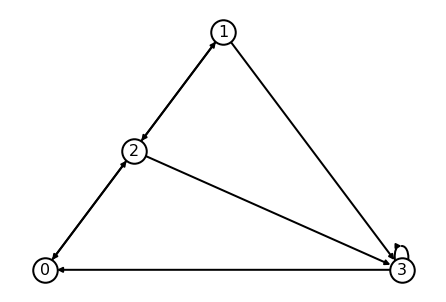

In [9]:
A = np.array([[0,0,1,0], [0,0,1,1],[1,1,0,1],[1,0,0,1]])
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)
nx.draw_planar (G, with_labels=True, **options)
## only problem with this is of course that the matrix is 0-indexed so nodes are labelled 0-3

# Trees

Using graphviz and pygraphviz


In [ ]:
import graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

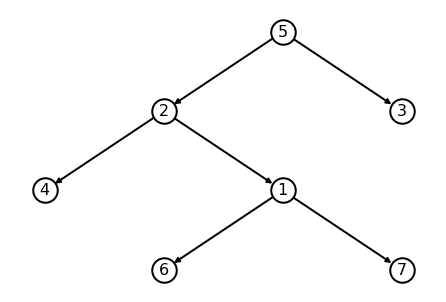

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout
G = nx.DiGraph()
G.add_edges_from([(5,2),(5,3),(2,4),(2,1),(1,6),(1,7)])
pos = graphviz_layout(G,prog='dot')
nx.draw(G, pos=pos, with_labels=True, **options)